## Name : Pratham Agarwal
## Roll no: C4-56

# ML TA-1

### Context :- 

Context
Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\PRATHAM\Downloads\Crop_recommendation.csv')

## Basic EDA 

In [7]:
# Display the first few rows of dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
# Display the last few rows of the dataset
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
# Get a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# Get the shape of the dataset
data.shape

(2200, 8)

In [11]:
# Get descriptive statistics of the dataset
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Identify and Handle Missing Values

In [12]:
# Check for missing values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Check For Duplicates and Handle Them

In [13]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')

Number of duplicate rows: 0


## Identify Outliers and Handle Them

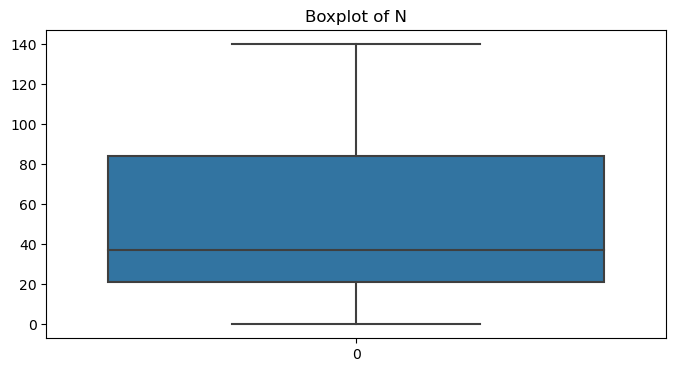

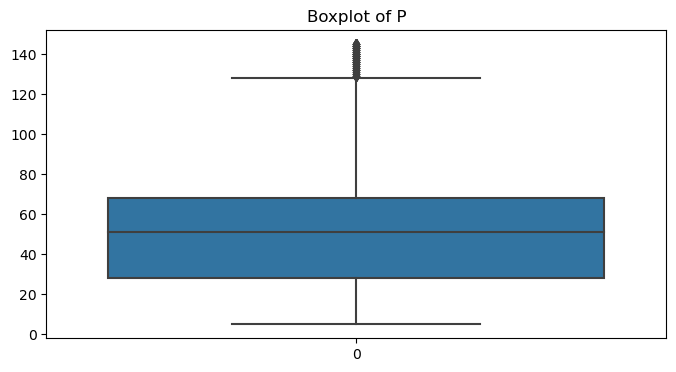

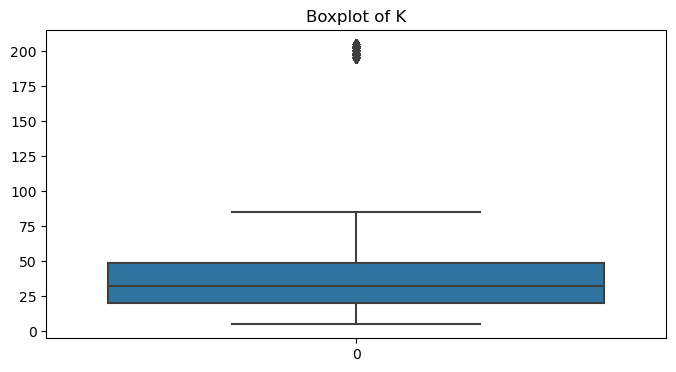

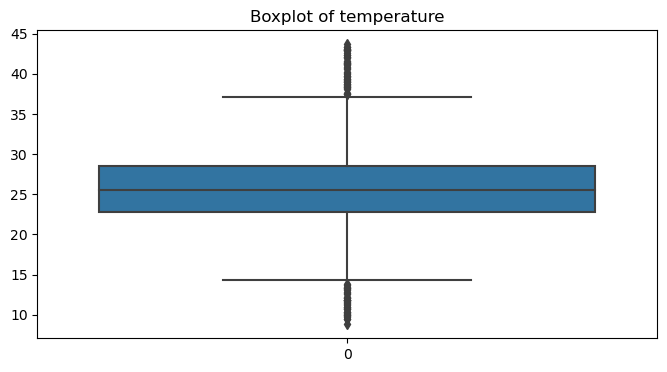

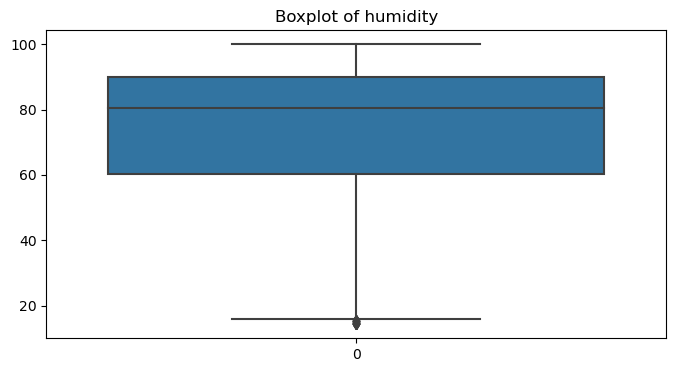

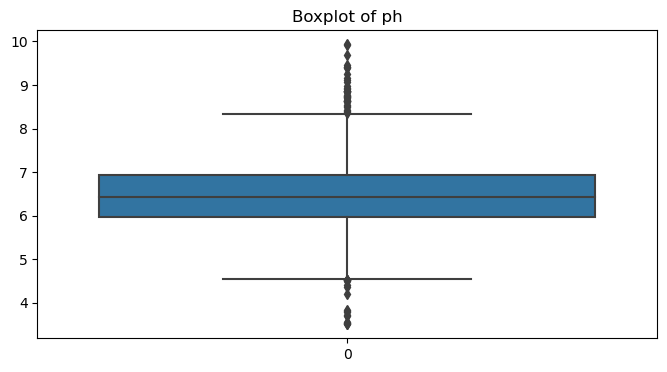

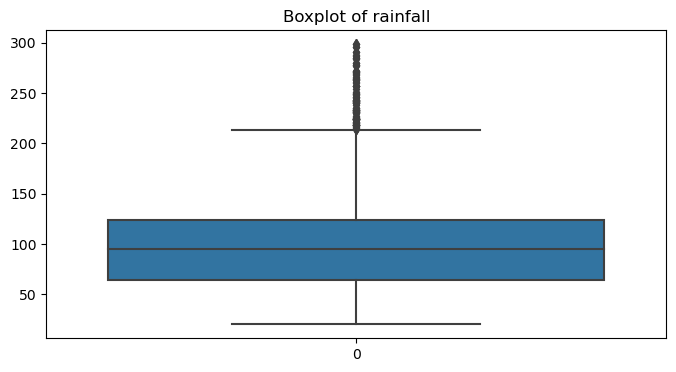

In [14]:
# Plot boxplots to visually identify outliers
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## Apply Data Encoding

In [16]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_columns}')

Categorical columns: Index(['label'], dtype='object')


In [18]:
## Applying Label Encoding to 'label' column

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'label' column
data['label_encoded'] = label_encoder.fit_transform(data['label'])

# Display the first few rows to see the new encoded column
print(data.head())

# Display the mapping of original categories to numeric labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f'Label mapping: {label_mapping}')

    N   P   K  temperature   humidity        ph    rainfall  label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20   
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20   
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20   
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20   
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20   

   label_encoded  
0             20  
1             20  
2             20  
3             20  
4             20  
Label mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21}


## Perform Univariate Analysis

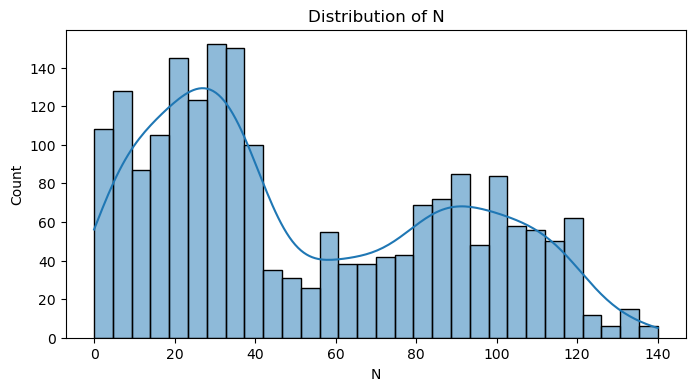

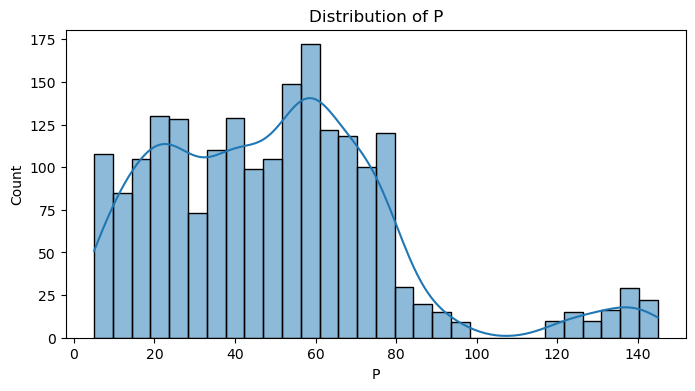

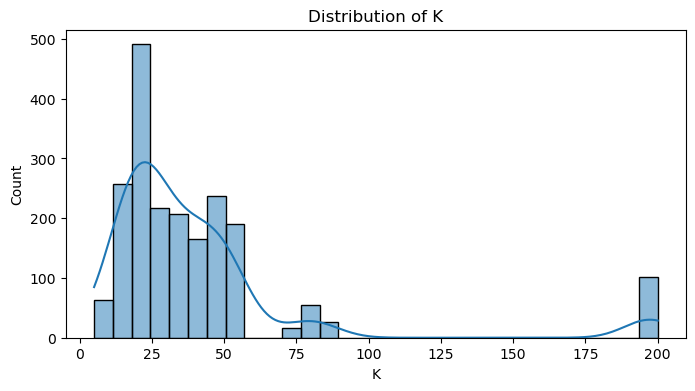

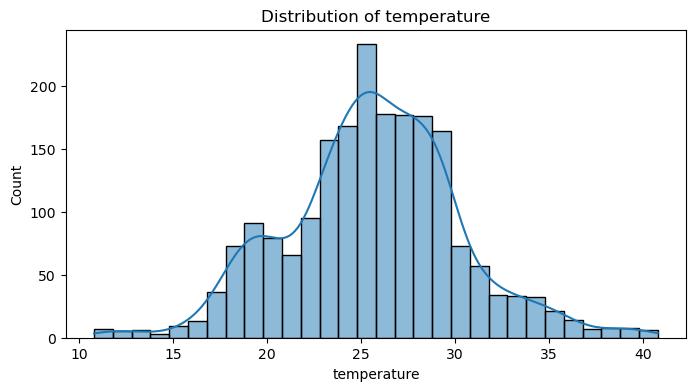

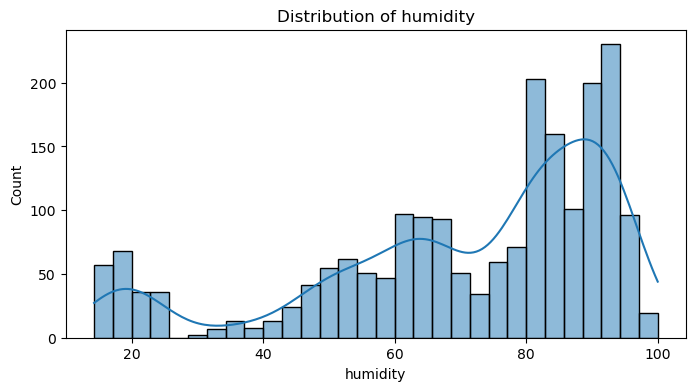

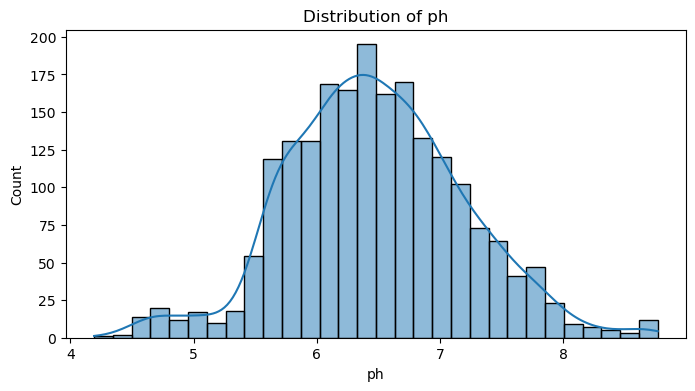

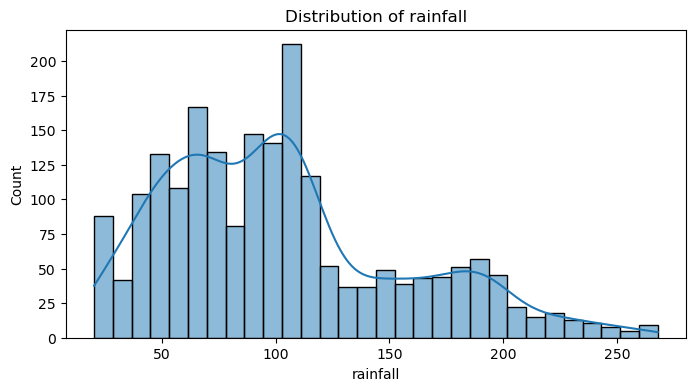

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis of numerical features
numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## Apply Bivariate Analysis

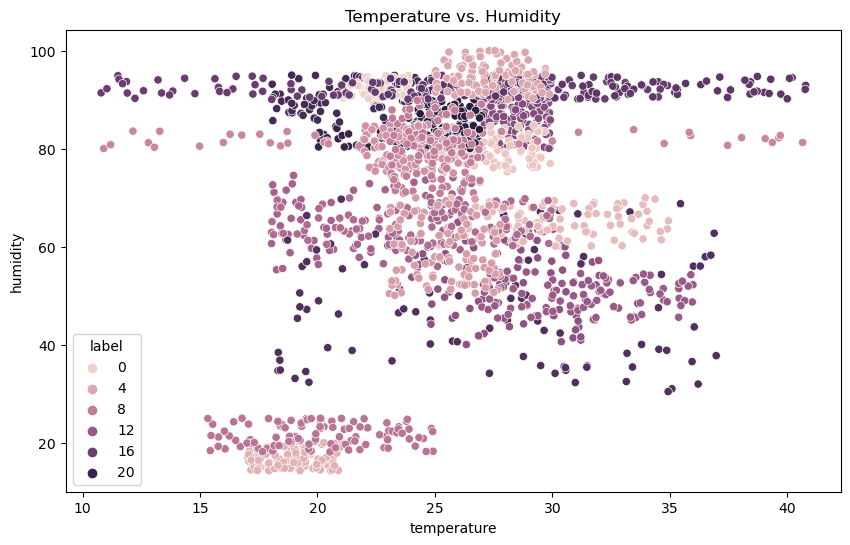

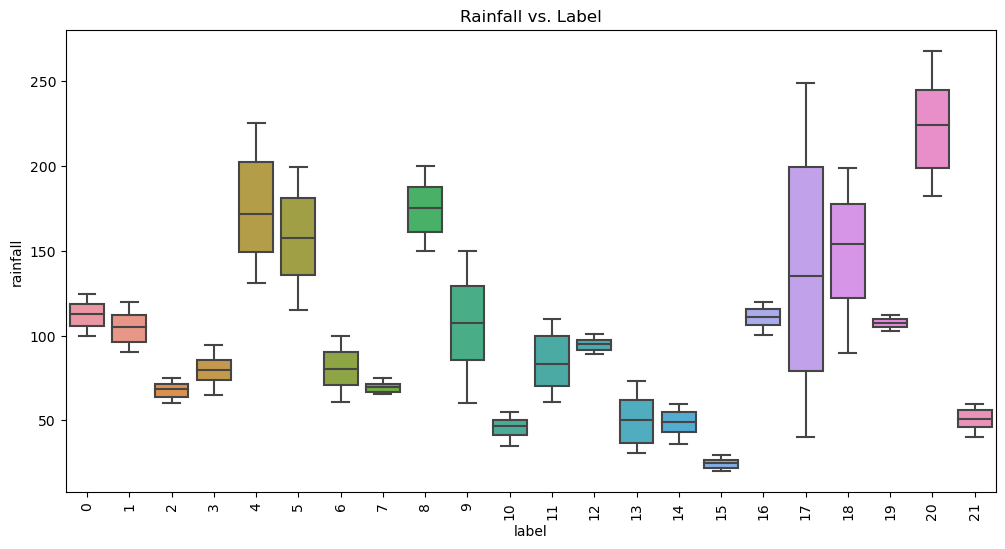

In [20]:
# Scatter plot between temperature and humidity colored by label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='temperature', y='humidity', hue='label')
plt.title('Temperature vs. Humidity')
plt.show()

# Box plot for one numerical column against the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='rainfall', data=data)
plt.xticks(rotation=90)
plt.title('Rainfall vs. Label')
plt.show()

## Apply Multivariate Analysis

C:\Users\PRATHAM\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


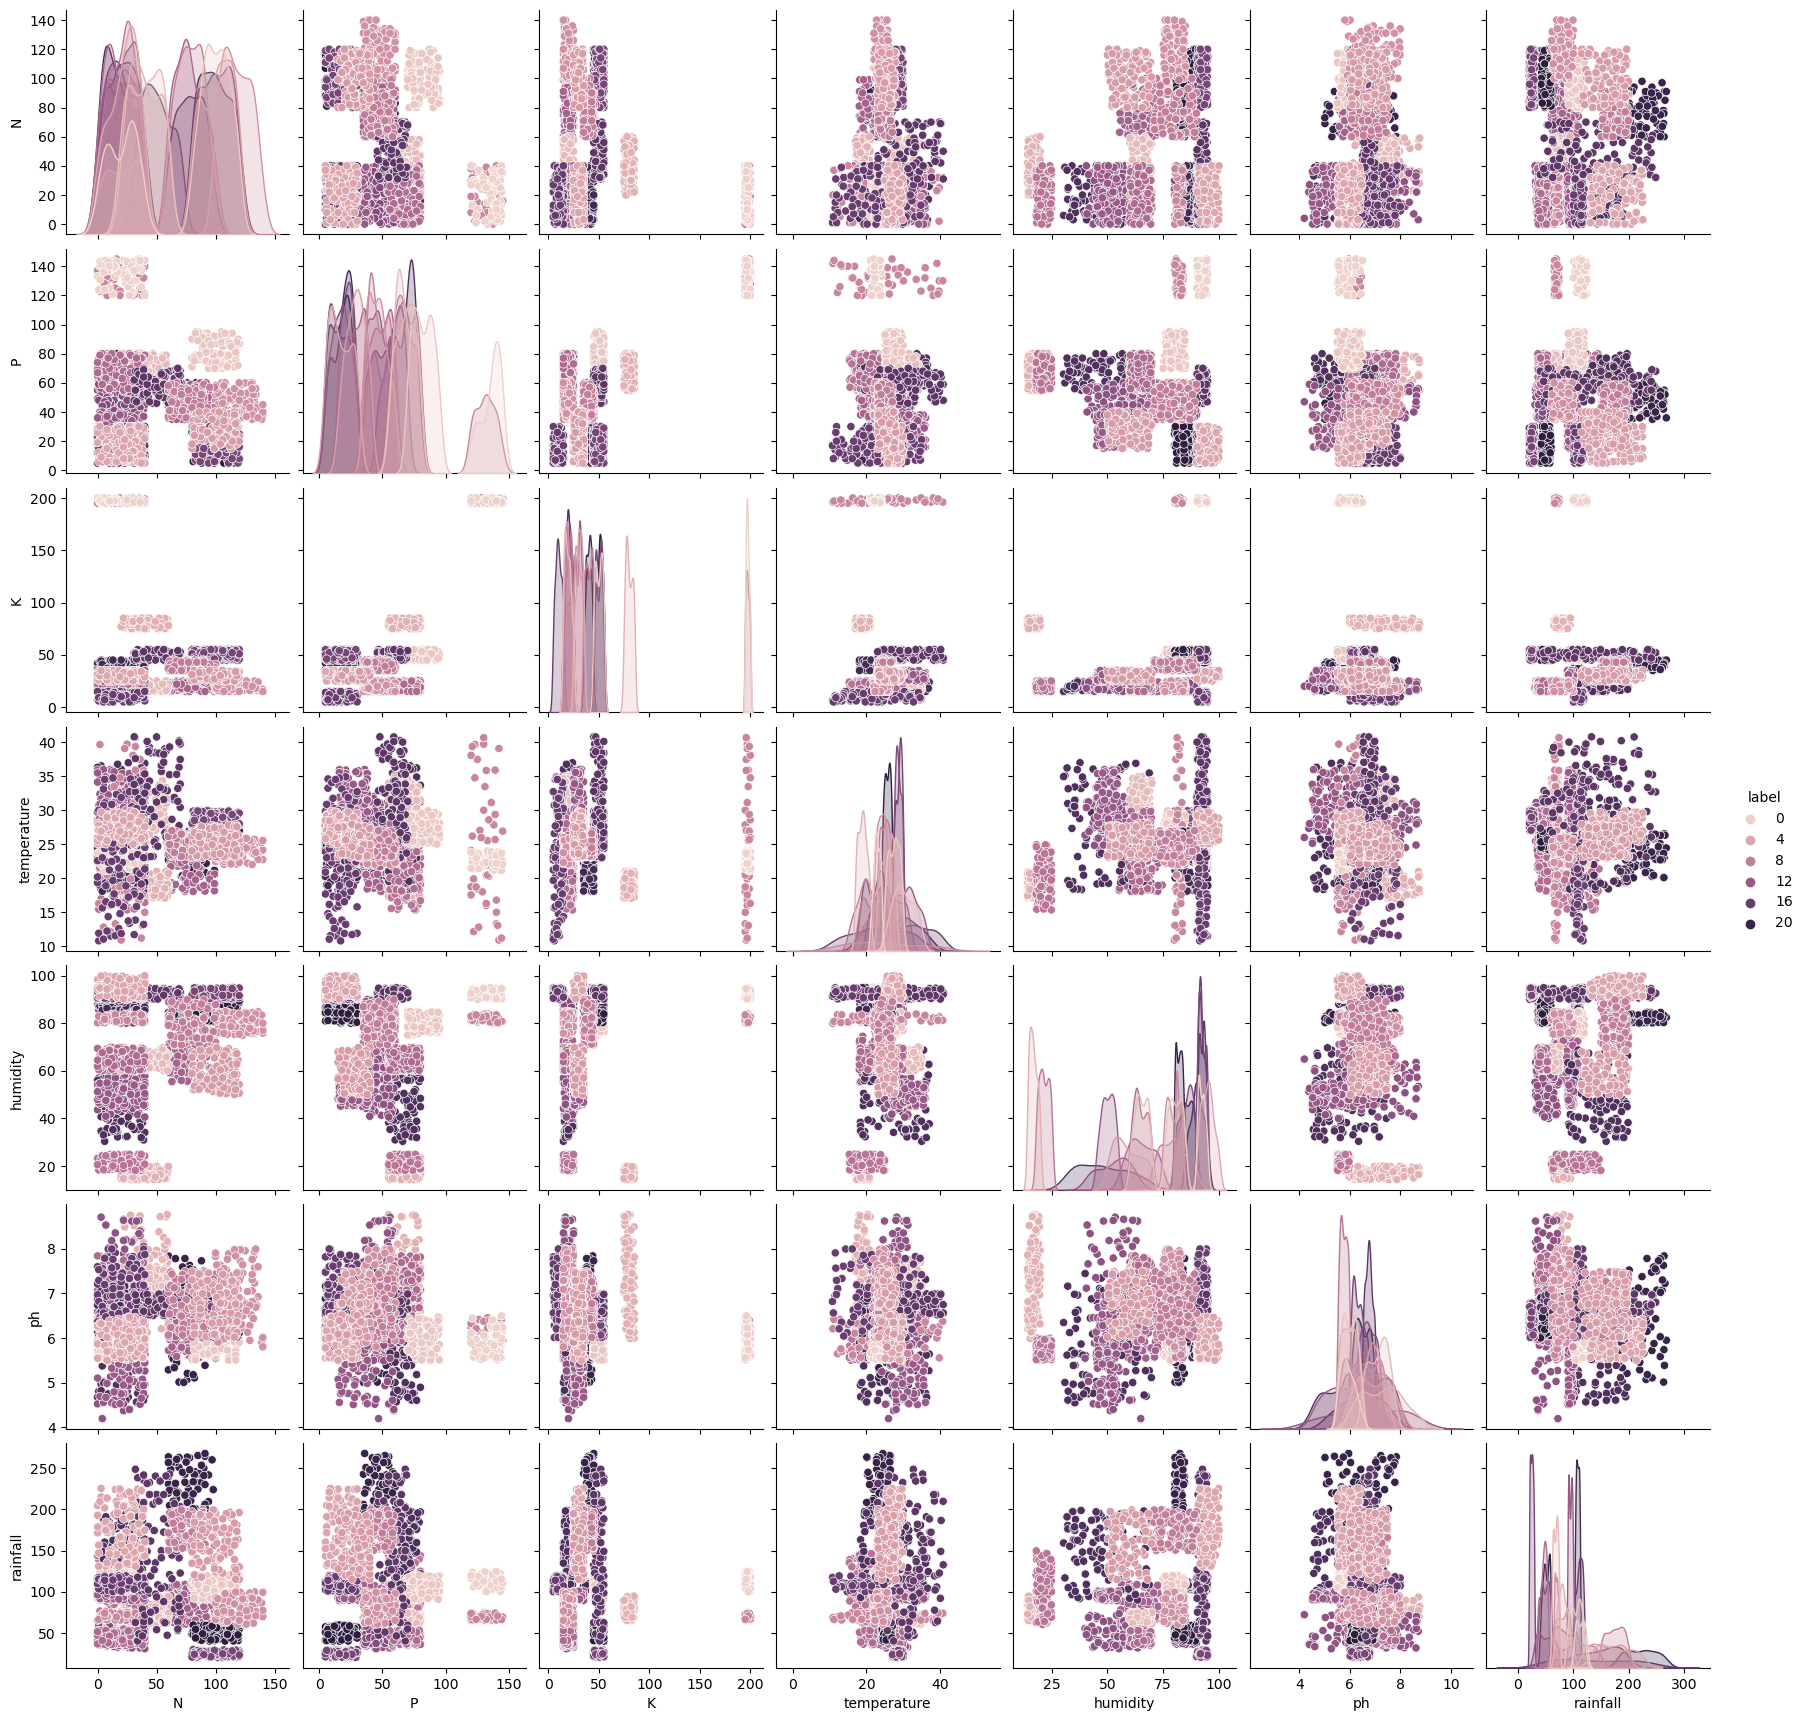

In [22]:
# Pairplot to visualize relationships between multiple features and the target
sns.pairplot(data[numerical_columns + ['label']], hue='label')
plt.show()


## Apply Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_features = scaler.fit_transform(data[numerical_columns])

# Create a DataFrame with scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_columns)

# Append the scaled features back to the original DataFrame
data[numerical_columns] = scaled_features_df

# Display first few rows to see scaled values
print(data.head())

          N         P         K  temperature  humidity        ph  rainfall  \
0  1.015677 -0.262625  0.046314    -1.029689  0.499163  0.033854  1.901267   
1  0.881973  0.285979 -0.004331    -0.836904  0.424602  0.780895  2.350179   
2  0.213452  0.183116  0.071636    -0.569821  0.513251  1.900680  3.056264   
3  0.587824 -0.502639 -0.029653     0.184819  0.417457  0.700349  2.656933   
4  0.694787 -0.262625  0.020992    -1.191924  0.481537  1.605089  3.032666   

   label  label_encoded  
0     20             20  
1     20             20  
2     20             20  
3     20             20  
4     20             20  


## Split The Dataset In The Ratio of 80:20

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['label', 'label_encoded'], axis=1)
y = data['label_encoded']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')
